# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Anomaly Detection with Isolation Forest

**Steps**:
1. Data Set: Obtain a dataset of server response times.
2. Train Model: Use Isolation Forest to train a model on the response time data.
3. Detect Anomalies: Predict which response times are anomalies.
4. Evaluate Results: Assess the number of anomalies detected.

=== Isolation Forest Anomaly Detection ===

Total data points: 300
Anomalies detected: 3

Anomaly Details:
      ResponseTime  Anomaly
50          400.0       -1
120          35.0       -1
250         380.0       -1


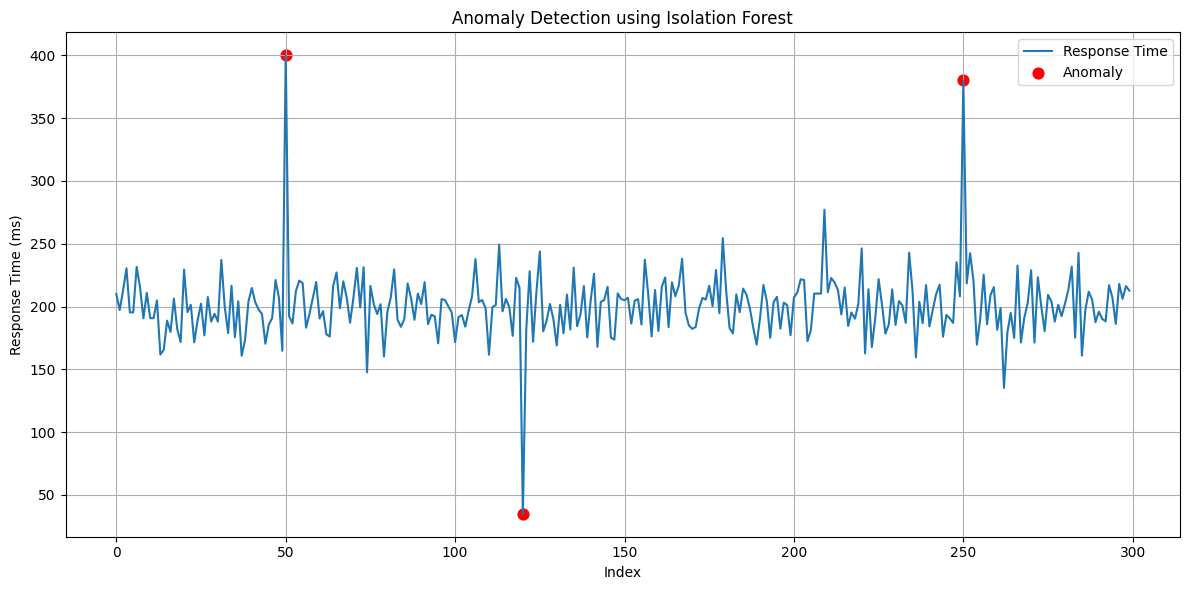

In [1]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# ---------------------
# Step 1: Generate or Load Dataset
# ---------------------
def load_response_data():
    np.random.seed(42)
    response_times = np.random.normal(loc=200, scale=20, size=300)

    # Inject anomalies
    response_times[50] = 400
    response_times[120] = 35
    response_times[250] = 380

    df = pd.DataFrame({
        'ResponseTime': response_times
    })
    return df

# ---------------------
# Step 2: Train Isolation Forest Model
# ---------------------
def train_isolation_forest(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[['ResponseTime']])

    model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    df['Anomaly'] = model.fit_predict(df_scaled)
    return df, model

# ---------------------
# Step 3: Detect Anomalies
# ---------------------
def detect_anomalies(df):
    anomalies = df[df['Anomaly'] == -1]
    return anomalies

# ---------------------
# Step 4: Visualize & Evaluate
# ---------------------
def visualize_anomalies(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['ResponseTime'], label='Response Time')
    plt.scatter(df[df['Anomaly'] == -1].index,
                df[df['Anomaly'] == -1]['ResponseTime'],
                color='red', label='Anomaly', s=60)
    plt.xlabel("Index")
    plt.ylabel("Response Time (ms)")
    plt.title("Anomaly Detection using Isolation Forest")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------------------
# Main Execution
# ---------------------
if __name__ == "__main__":
    print("=== Isolation Forest Anomaly Detection ===")
    df = load_response_data()
    df, model = train_isolation_forest(df)
    anomalies = detect_anomalies(df)

    print(f"\nTotal data points: {len(df)}")
    print(f"Anomalies detected: {len(anomalies)}")
    print("\nAnomaly Details:\n", anomalies)

    visualize_anomalies(df)
